## INSTRUCTIONS - IMPORTANT:

Every student is expected to submit their own, original solutions for this assignment. While collaborative discussions among classmates are encouraged for better understanding, it is crucial that the work you submit is your own. Copying or replicating someone else's solutions is a breach of academic integrity and will not be tolerated. The use of **AI tools** is also **prohibited** for this assignment.

The dataset used in this assignment is derived from Inside Airbnb, available [here](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-06-05/visualisations/listings.csv). It is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

**Please note that this dataset has been modified and adapted for the scope of this academic assignment. If you are interested in the original data or further Airbnb datasets, we encourage you to visit Inside Airbnb's website: [insideairbnb.com](http://insideairbnb.com).**


<h3> This assignment is divided into two main components: </h3>

1. **Data Manipulation**: Focused on cleaning and preparing the dataset.
2. **Exploratory Data Analysis (EDA)**: Concentrated on analyzing and interpreting the data.

# PART-1 (Data Cleaning and Manipulation)

We will begin by importing the required modules and reading the data file.

In [3]:
!pip install numpy scikit-learn pandas seaborn matplotlib


You should consider upgrading via the 'C:\Users\ADMIN\PycharmProject\pythonProject2\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("airbnb_final.csv")

In [6]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484.0,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647.0,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


### 1.1. **What is the shape of the dataset?**

In [7]:
#Code goes here
print(df.shape)


(7608, 15)


### 1.2 **Identify the data types of each column. Are there any columns that need type conversion?**

In [8]:
# 1.2.1 Code to identify data types goes here.
print(df.dtypes)


host_id             float64
neighbourhood        object
latitude            float64
longitude           float64
room_type            object
price in $          float64
minimum_nights      float64
availability_365    float64
Apartment_type       object
City                 object
Rating              float64
No_of_bed_rooms     float64
No_of_beds          float64
No_of_bathrooms     float64
Bathroom_type        object
dtype: object


In [12]:
# 1.2.3 change the host_id column to an integer 
df['host_id'] = df['host_id'].fillna(0).astype(int)



### 1.3. **Are there any duplicate rows in the dataset? If yes, how would you handle them?**

In [15]:
# 1.3.1 check for duplicate values
duplicate_data = df.duplicated().sum()
print(duplicate_data)

0


### 1.4. **Check for missing values, How would you handle the missing values in the dataset?**

In [16]:
# 1.4.1 check for missing values
missing_val = df.isnull().sum()
print(missing_val)


host_id                0
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $            10
minimum_nights         9
availability_365       1
Apartment_type         1
City                   1
Rating              1578
No_of_bed_rooms      284
No_of_beds            17
No_of_bathrooms      804
Bathroom_type          1
dtype: int64


In [19]:
# 1.4.3 Populate missing values in the 'price in $' column with the mean.
mean_value = df['price in $'].mean()
df['price in $'] = df['price in $'].fillna(mean_value)

In [20]:
# 1.4.4 Verify that there are no more missing values in the 'price in $' column
missing = df['price in $'].isnull().sum()
print(missing)

0


In [22]:
# 1.4.5 Populate all missing values in the City column with "Amsterdam"
df['City'] = df['City'].fillna("Amsterdam")

In [23]:
# 1.4.6 Verify that there are no more missing values in the 'City' column
missing = df['City'].isnull().sum()
print(missing)

0


In [24]:
# 1.4.7 Drop all remaining rows with missing data. Store the result in a new dataframe called df2.
df2 = df.dropna()

In [25]:
df2.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
2,1100324,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private
5,776296,De Baarsjes - Oud-West,52.36270,4.85693,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,private


### 1.5. Compare the shapes of the original (df) and new (df2) dataframes, and verify there are no missing values in df2.

In [26]:
# 1.5.1 code to show shapes of old and new dataframes
print(df.shape)
print(df2.shape)

(7608, 15)
(5108, 15)


In [27]:
# 1.5.2 Code to verify no missing values
missing = df2.isnull().sum()
print(missing)

host_id             0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price in $          0
minimum_nights      0
availability_365    0
Apartment_type      0
City                0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64


### 1.6. **Drop the 'latitude' and 'longitude' columns. How does it affect the shape of the dataset?**

Note: from here forward, work with the df2 DataFrame.

In [28]:
# 1.6.1 Code goes here
df2 = df2.drop(columns=['latitude', 'longitude'])

In [29]:
# 1.6.2 Show new shape
print(df2.shape)

(5108, 13)


### 1.7. **List the  unique values in Apartment_type and Bathroom_type**

In [30]:
# 1.7.1 Find and list the unique apartment tpyes.
unique_A = df2['Apartment_type'].unique()
print(unique_A)

['Condo' 'Rental unit' 'Houseboat' 'Boutique hotel' 'Guest suite' 'Home'
 'Loft' 'Boat' 'Bed and breakfast' 'Townhouse' 'Chalet' 'Guesthouse'
 'Farm stay' 'Serviced apartment' 'Barn' 'Hotel' 'Cabin' 'Villa'
 'Place to stay' 'Tiny home' 'Cottage' 'Nature lodge' 'Tower' 'Hostel'
 'Aparthotel' 'Camper/RV' 'Earthen home' 'casa particular' 'Vacation home'
 'Tent']


In [31]:
# 1.7.2 Find and list the unique bathroom types.
unique_B = df2['Bathroom_type'].unique()
print(unique_B)

['shared' 'private']


### 1.8. **Replace the bathroom types (shared and private) with integers (0 and 1).**

In [33]:
# 1.8.1 Replace the strings with integers
df2['Bathroom_type'] = df2['Bathroom_type'].replace({'shared': 0, 'private': 1}).astype(int)

In [34]:
# 1.8.2 Verify the changes
unique_B = df2['Bathroom_type'].unique()
print(unique_B)

[0 1]


# Part - 2 (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. 

### 2.1. **Describe the data.**

In [35]:
# Describe data here.
print(df2.describe())

            host_id    price in $  minimum_nights  availability_365  \
count  5.108000e+03   5108.000000     5108.000000       5108.000000   
mean   8.957354e+07    250.071427        5.344949         68.873727   
std    1.283283e+08    239.576562       40.127865        100.861524   
min    0.000000e+00     18.000000        1.000000          0.000000   
25%    8.946164e+06    149.000000        2.000000          0.000000   
50%    2.942286e+07    205.500000        3.000000         12.000000   
75%    1.051994e+08    300.000000        4.000000        114.000000   
max    5.126757e+08  10000.000000     1001.000000        365.000000   

            Rating  No_of_bed_rooms   No_of_beds  No_of_bathrooms  \
count  5108.000000      5108.000000  5108.000000      5108.000000   
mean      4.828872         1.615114     1.615114         1.316856   
std       0.214108         0.891545     0.891545         0.467762   
min       1.670000         1.000000     1.000000         0.000000   
25%       4.750

### 2.2. **Identify significant correlations.**

In [37]:
# 2.2.1 Build the correlation matrix
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df2.corr()

print(correlation_matrix)

                   host_id  price in $  minimum_nights  availability_365  \
host_id           1.000000    0.042410       -0.009971          0.165185   
price in $        0.042410    1.000000       -0.003072          0.171706   
minimum_nights   -0.009971   -0.003072        1.000000          0.011592   
availability_365  0.165185    0.171706        0.011592          1.000000   
Rating           -0.164723    0.045040        0.011779         -0.167042   
No_of_bed_rooms  -0.071205    0.292805        0.005830         -0.065623   
No_of_beds       -0.071205    0.292805        0.005830         -0.065623   
No_of_bathrooms  -0.046735    0.266971       -0.004859         -0.028057   
Bathroom_type    -0.066510    0.171660        0.002631         -0.178860   

                    Rating  No_of_bed_rooms  No_of_beds  No_of_bathrooms  \
host_id          -0.164723        -0.071205   -0.071205        -0.046735   
price in $        0.045040         0.292805    0.292805         0.266971   
minimum_nig

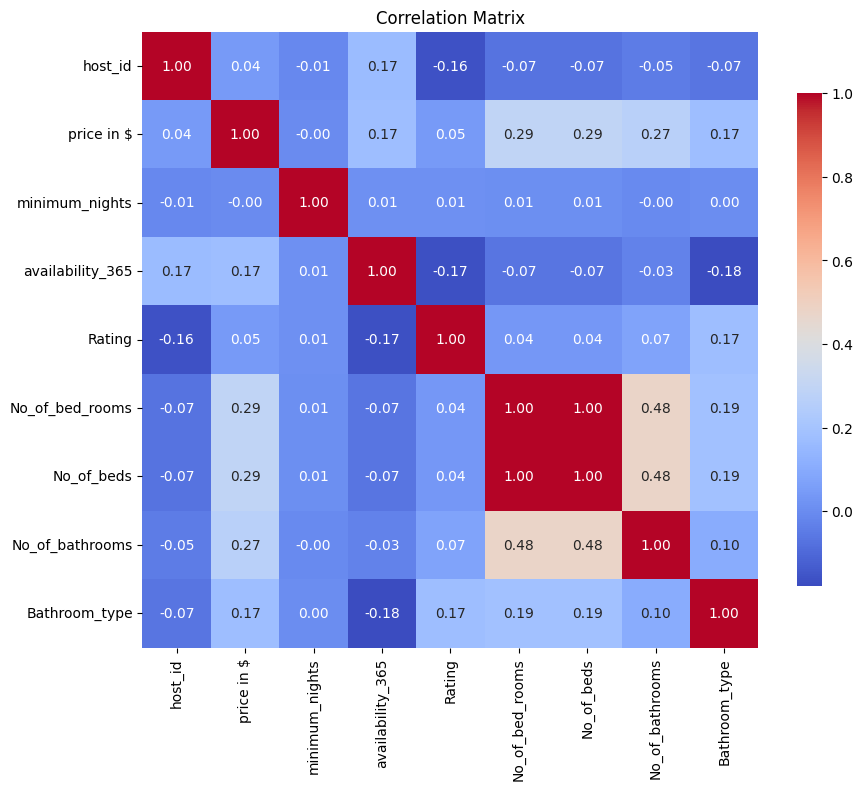

In [38]:
# 2.2.2 Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

### 2.3. **Check if is there any multicollinearity.**

In [40]:
!pip install statsmodels


You should consider upgrading via the 'C:\Users\ADMIN\PycharmProject\pythonProject2\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [41]:
#Import the statsmodels tools needed to perform VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [42]:
# 2.3.1 Select all numerical columns *except* host_id.
numerical_columns = df2.select_dtypes(include=[np.number]).drop(columns=['host_id'])

In [43]:
# 2.3.2 Make sure there are no missing (NaN) values 
missing_values = numerical_columns.isnull().sum()
print(missing_values)

price in $          0
minimum_nights      0
availability_365    0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64


In [44]:
# 2.3.3 Add a constant column for the VIF calculation
X = sm.add_constant(numerical_columns)

In [45]:
# 2.3.4 Calculate the VIF for each of the columns and display the information.(Make E.C.?)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Feature         VIF
0             const  534.320122
1        price in $    1.201058
2    minimum_nights    1.000520
3  availability_365    1.114930
4            Rating    1.058086
5   No_of_bed_rooms         inf
6        No_of_beds         inf
7   No_of_bathrooms    1.328305
8     Bathroom_type    1.118485


C:\Users\ADMIN\PycharmProject\pythonProject2\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### 2.4. **Spot outliers in the dataset.**
(we will not remove outliers for this homework).

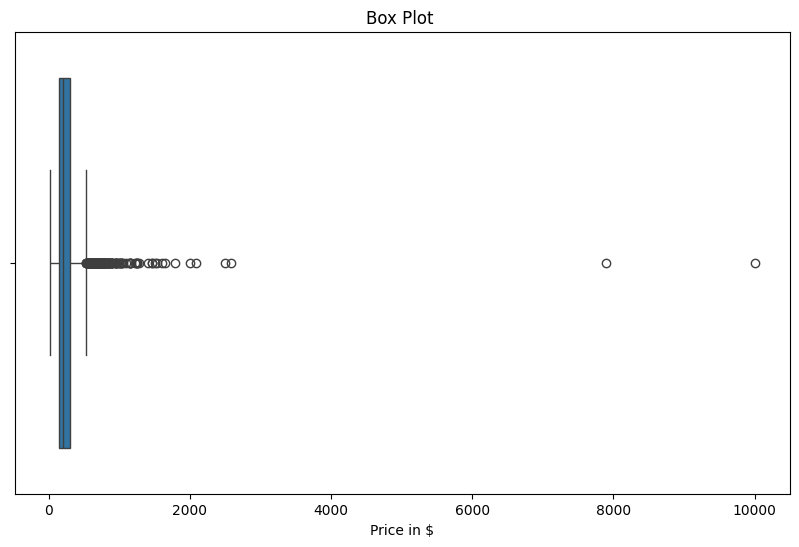

In [46]:
# 2.4.1. Show boxplot of price in $ 
plt.figure(figsize=(10, 6))

sns.boxplot(data=df2, x='price in $')

plt.title('Box Plot ')
plt.xlabel('Price in $')

plt.show()

In [47]:
# 2.4.2 Show the maximum price in $
maximum_price = df2['price in $'].max()
print(maximum_price)

10000.0


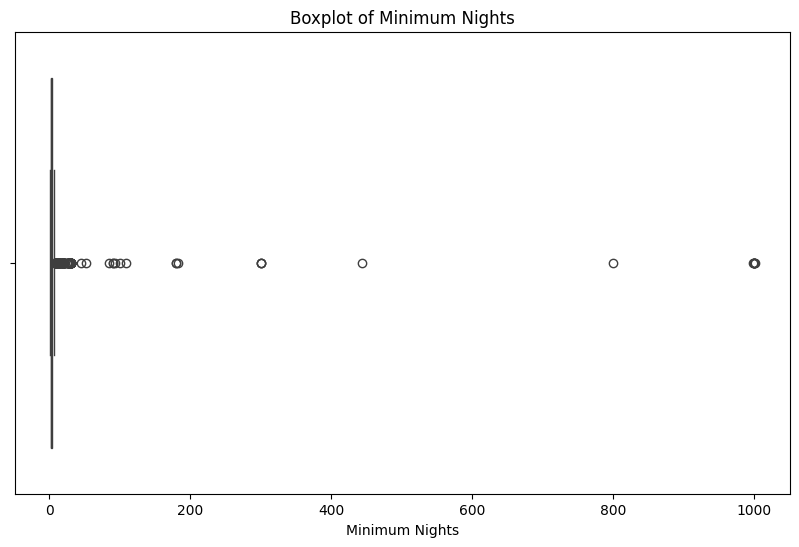

In [48]:
# 2.4.3 Show a boxplot for minimum_nights
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='minimum_nights')
plt.title('Boxplot of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.show()

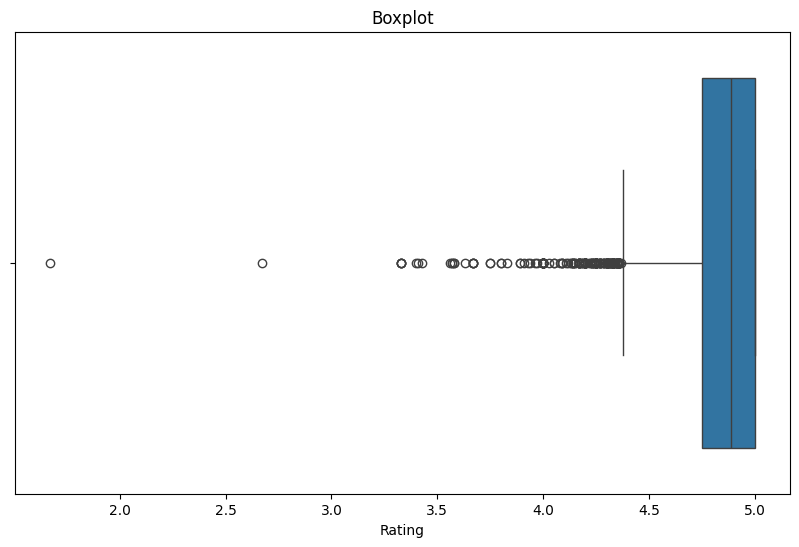

In [49]:
# 2.4.4 Show a boxplot for Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='Rating')
plt.title('Boxplot')
plt.xlabel('Rating')
plt.show()

In [50]:
# 2.4.5 Define a function to drop outliers beyond a specific multiplier of the IQR.
def drop_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


In [51]:
# 2.4.6 Find outliers for 'price in $', 'minimum_nights', and 'Rating' using the standard multiplier (1.5)
columns_to_check = ['price in $', 'minimum_nights', 'Rating']

outliers_info = {}

for column in columns_to_check:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]

    outliers_info[column] = outliers

for column, outlier_data in outliers_info.items():
    print(f"Outliers in '{column}':")
    print(outlier_data)
    print("\n")


Outliers in 'price in $':
        host_id                           neighbourhood        room_type  \
14      1005087                            Centrum-West  Entire home/apt   
38      1451657                                    Zuid  Entire home/apt   
60    176944339                              Westerpark  Entire home/apt   
129     4398387                 De Pijp - Rivierenbuurt  Entire home/apt   
152    22642887                            Centrum-Oost  Entire home/apt   
...         ...                                     ...              ...   
7119  504589340                            Centrum-Oost  Entire home/apt   
7181   60098351                 De Pijp - Rivierenbuurt  Entire home/apt   
7250   22017809  Oostelijk Havengebied - Indische Buurt  Entire home/apt   
7357  311321908                            Centrum-West     Private room   
7359  245303717                            Centrum-Oost  Entire home/apt   

      price in $  minimum_nights  availability_365 Apartment_

In [52]:
# 2.4.7 Display the count of outliers in each selected column
outlier_counts = {}

for column in columns_to_check:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

for column, count in outlier_counts.items():
    print(f"Outliers in '{column}': {count}")


Outliers in 'price in $': 232
Outliers in 'minimum_nights': 170
Outliers in 'Rating': 209


In [53]:
# 2.4.8 Find outliers for the same column using a multiplier of 3.
outlier_counts_multiplier_3 = {}
for column in columns_to_check:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    outlier_counts_multiplier_3[column] = outliers.shape[0]
for column, count in outlier_counts_multiplier_3.items():
    print(f"Outliers in '{column}' : {count}")


Outliers in 'price in $' : 71
Outliers in 'minimum_nights' : 127
Outliers in 'Rating' : 31


In [55]:
# 2.4.9 Display the new count of outliers in each selected column
for column, count in outlier_counts_multiplier_3.items():
    print(f"{column}: {count}")

price in $: 71
minimum_nights: 127
Rating: 31


### 2.5. **Compute the Average Price for Each Type of Listing.**

In [56]:
# 2.5.1 Group the data by 'room_type' and calculate the average price for each type
average_by_room = df2.groupby('room_type')['price in $'].mean().reset_index()
print(average_by_room)


         room_type  price in $
0  Entire home/apt  267.956400
1       Hotel room  195.833333
2     Private room  163.124324
3      Shared room  162.916667


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1328\2757347607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='price in $', data=average_by_room, palette='viridis')


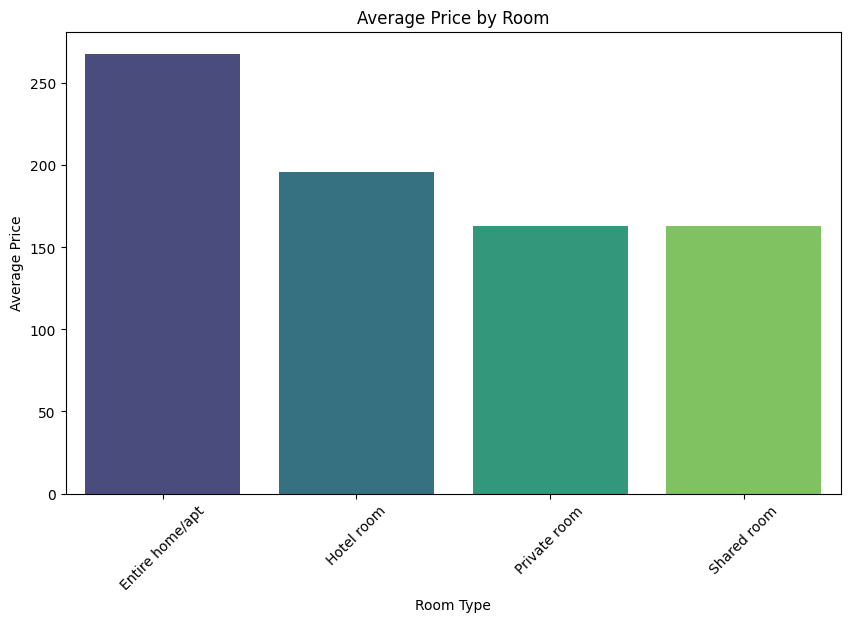

In [57]:
# 2.5.2 Plot and display the average price for each room type
average_by_room = df2.groupby('room_type')['price in $'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price in $', data=average_by_room, palette='viridis')
plt.title('Average Price by Room')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

### 2.6. **How Many Listings Are There for Each Unique 'Apartment Type'?**

In [58]:
# 2.6.1 Count the frequency of each unique 'Apartment_type'
apartment_counts = df2['Apartment_type'].value_counts()
print(apartment_counts)

Apartment_type
Rental unit           2448
Condo                 1104
Home                   449
Townhouse              234
Loft                   159
Houseboat              154
Bed and breakfast      130
Boat                   102
Serviced apartment      66
Guest suite             51
Hostel                  42
Boutique hotel          40
Hotel                   34
Guesthouse              17
Villa                   14
Place to stay           12
Vacation home           12
casa particular         10
Aparthotel               9
Tiny home                6
Cabin                    4
Chalet                   2
Cottage                  2
Farm stay                1
Nature lodge             1
Barn                     1
Camper/RV                1
Tower                    1
Earthen home             1
Tent                     1
Name: count, dtype: int64


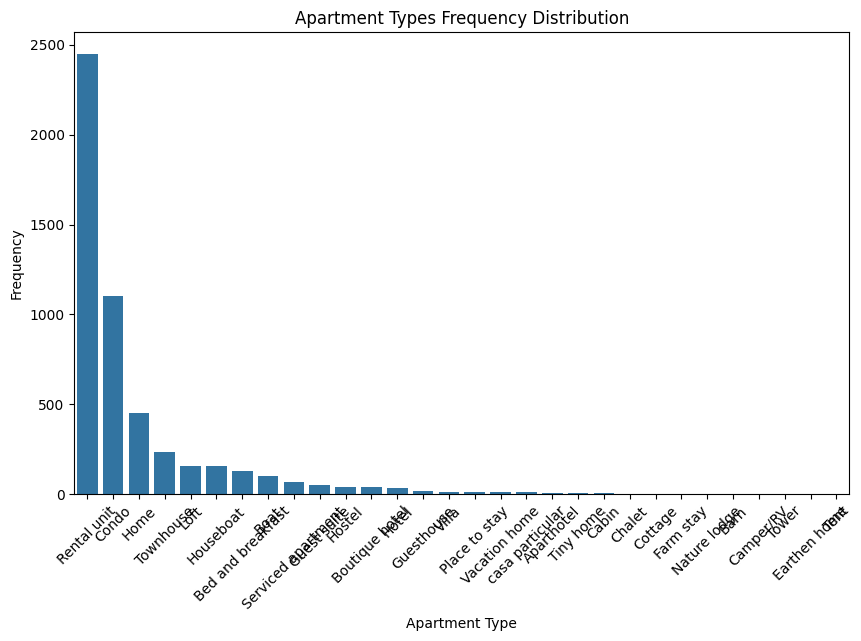

In [59]:
# 2.6.2 Plot the frequency distribution of 'Apartment_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Apartment_type', order=df2['Apartment_type'].value_counts().index)
plt.title('Apartment Types Frequency Distribution')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

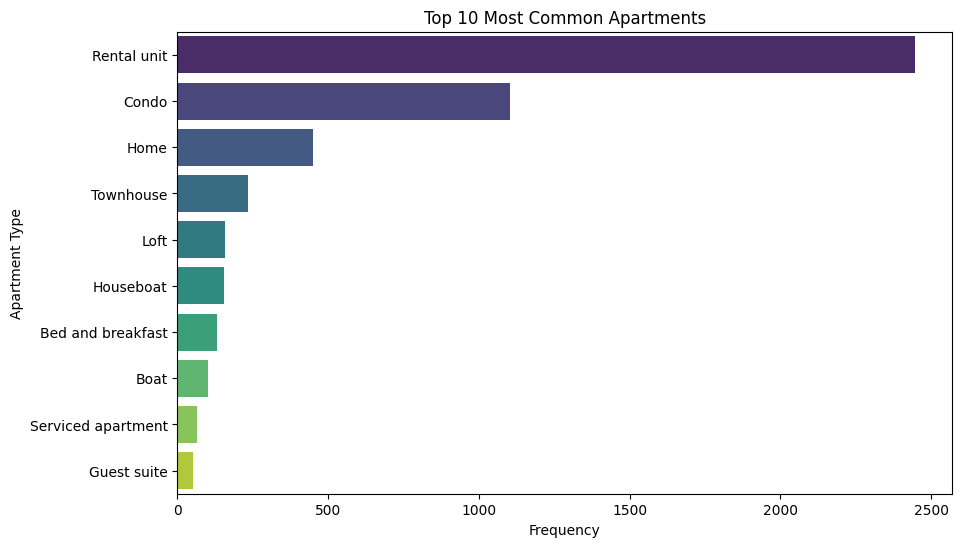

In [61]:
# 2.6.3. Find, Plot, and Display the top 10 most common apartment types
top_apartment_types = df2['Apartment_type'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_apartment_types.values, y=top_apartment_types.index, hue=top_apartment_types.index, palette='viridis', legend=False)
plt.title('Top 10 Most Common Apartments')
plt.xlabel('Frequency')
plt.ylabel('Apartment Type')
plt.show()


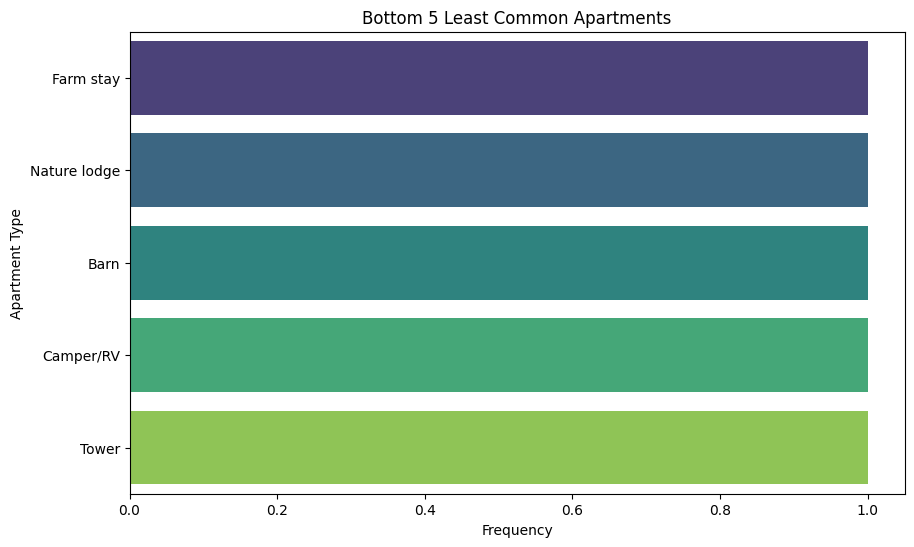

In [63]:
# 2.6.4 Find, Plot, and Display the bottom 5 least common apartment types
bottom_apartment_types = df2['Apartment_type'].value_counts().nsmallest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_apartment_types.values, y=bottom_apartment_types.index, hue=bottom_apartment_types.index, palette='viridis', legend=False)
plt.title('Bottom 5 Least Common Apartments')
plt.xlabel('Frequency')
plt.ylabel('Apartment Type')
plt.show()



### 2.7. **Identify the Top 5 Neighbourhoods with the Highest Average Listing Prices.**

In [64]:
# 2.7.1 Find the top 5 most expensive neighbourhoods based on average price
neighbour = df2.groupby('neighbourhood')['price in $'].mean().nlargest(5)
print(neighbour)


neighbourhood
Centrum-West                332.298308
Centrum-Oost                305.447601
Zuid                        271.715134
De Pijp - Rivierenbuurt     267.334606
IJburg - Zeeburgereiland    262.265746
Name: price in $, dtype: float64


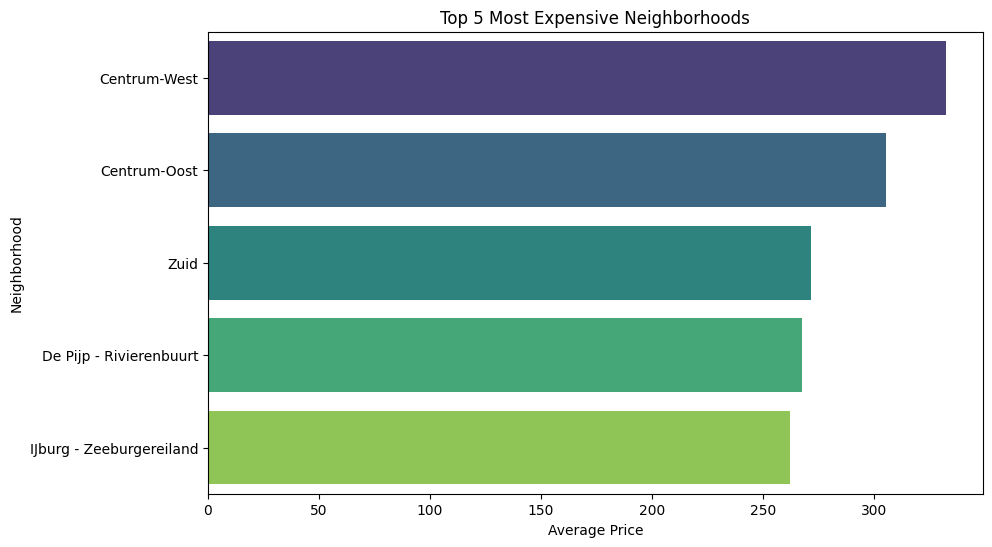

In [66]:
# 2.7.2. Plot and display the top 5 most expensive neighbourhoods
top_neighbourhoods = df2.groupby('neighbourhood')['price in $'].mean().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette='viridis', hue=top_neighbourhoods.index, legend=False)
plt.title('Top 5 Most Expensive Neighborhoods')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()